In [2]:
library(ArchR)
# library(Signac)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(gt)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm10.knownGene
library(clusterProfiler)
library(ReactomePA)
library(DOSE)
#plot track
library(scATACutils)
library(dplyr)
library(readr)
library(ggplot2)
library(org.Mm.eg.db)
library(ggpubr)

Setting default number of Parallel threads to 1.

Setting default genome to Mm10.



# Loading data like so

In [3]:
Merged.proj2 <- readRDS(file= "./gonad_fil_somatic202112/Save-ArchR-Project.rds")
h5disableFileLocking()
getAvailableMatrices(Merged.proj2)
# Merged.proj <- readRDS("/home/leetl/Gonocyte/Raw_data/Gonocyte.4sample.wo.doubletfiltering/")
Merged.proj2 <- addImputeWeights(Merged.proj2,k=15,ka=4,td=3,sampleCells = 5000,reducedDims = "IterativeLSI")

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-cf868fc279e-Date-2023-04-20_Time-22-35-14.log
If there is an issue, please report to github with logFile!

2023-04-20 22:35:16 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b65134b2b988-Date-2022-10-20_Time-11-52-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

2 

3 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b65134b2b988-Date-2022-10-20_Time-11-52-01.log



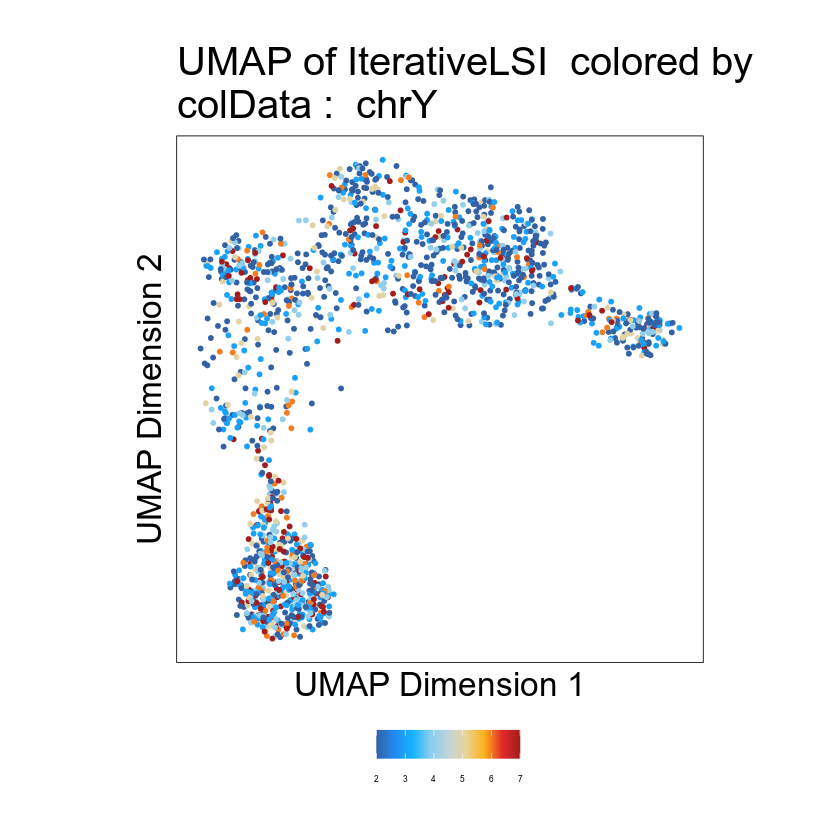

$chrY

$cluster

$Sample


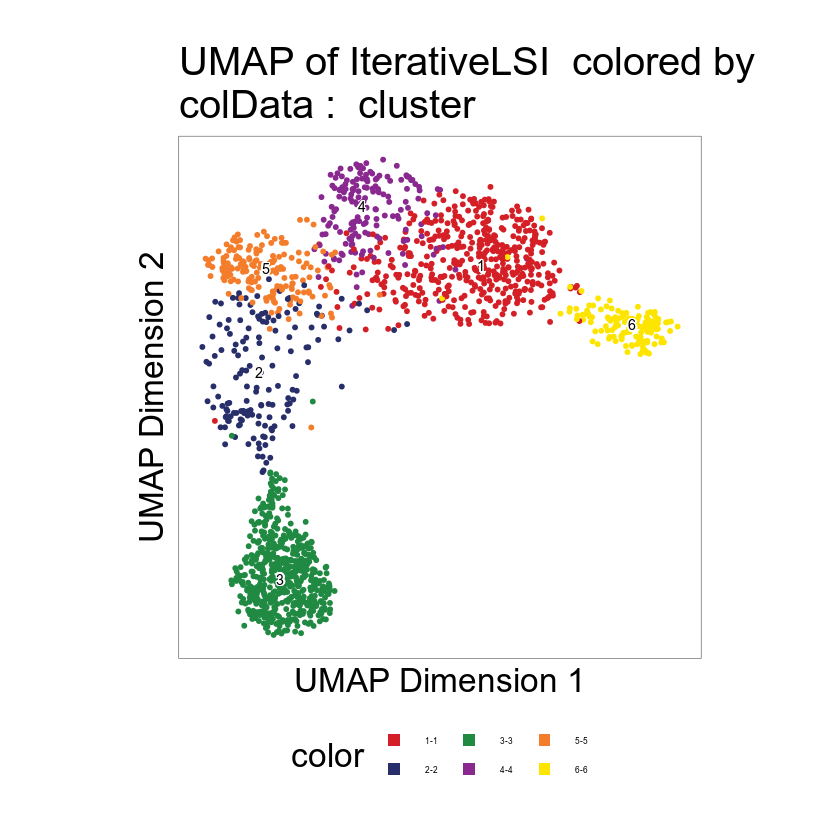

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b6512d53df27-Date-2022-10-20_Time-11-52-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

2 

3 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b6512d53df27-Date-2022-10-20_Time-11-52-08.log



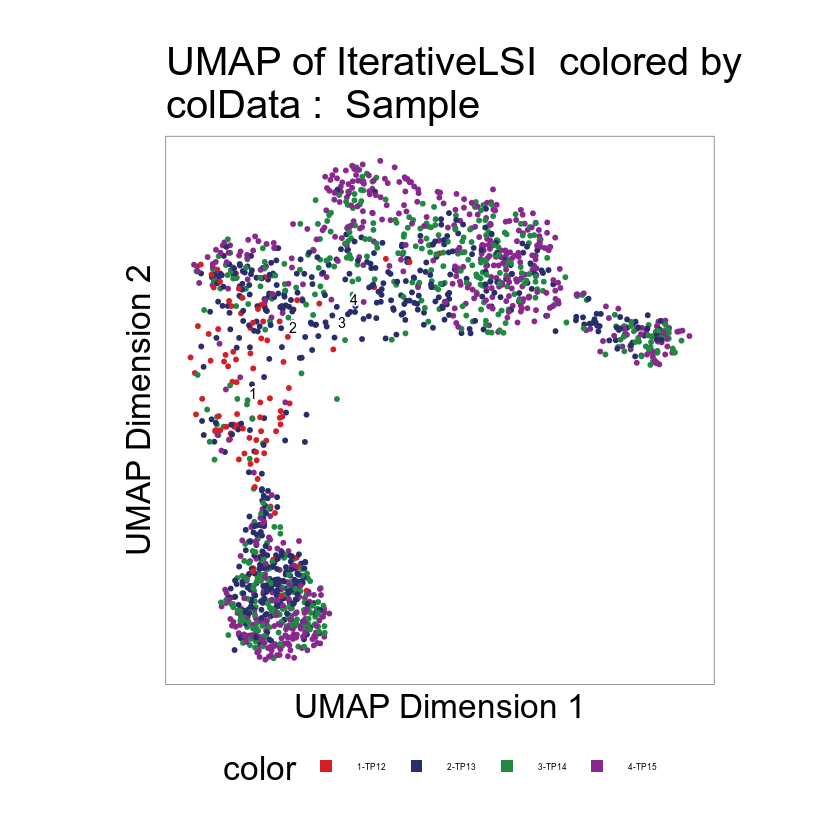

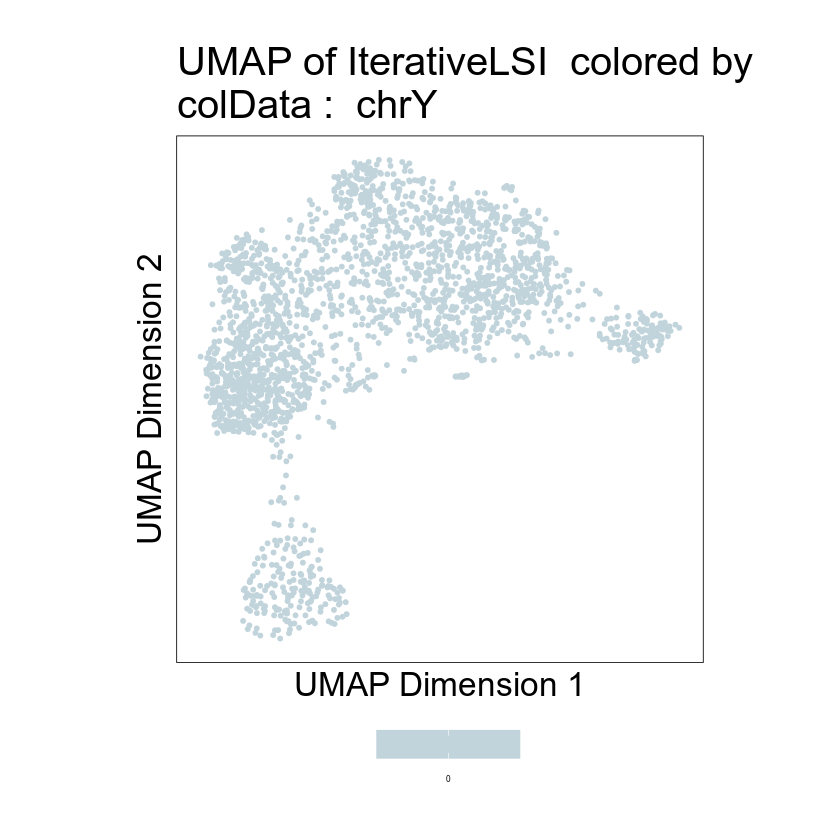

$chrY

$cluster

$Sample


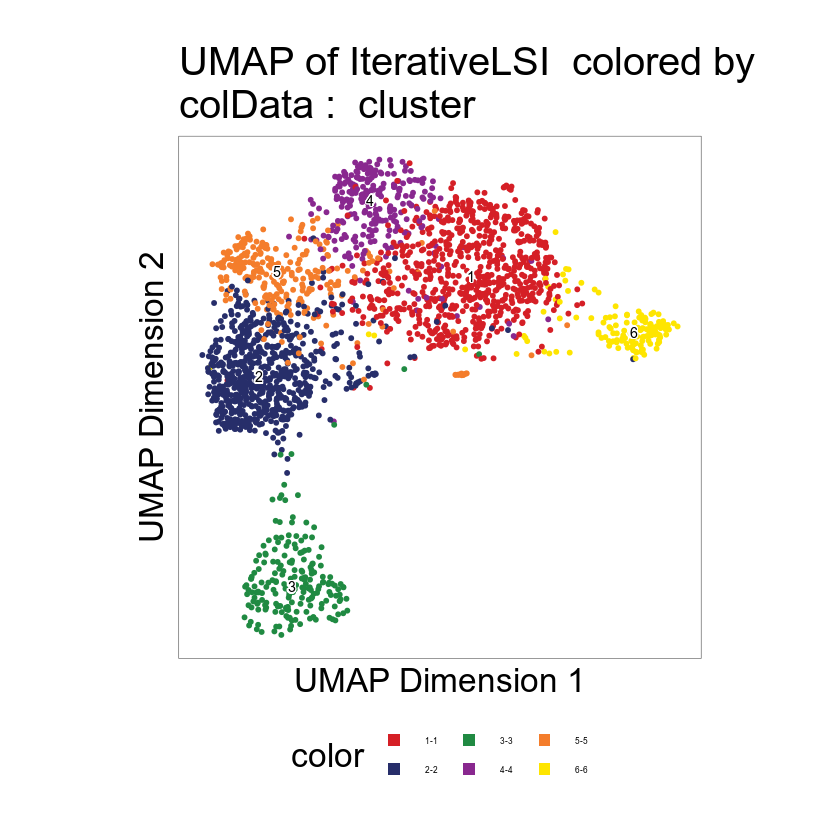

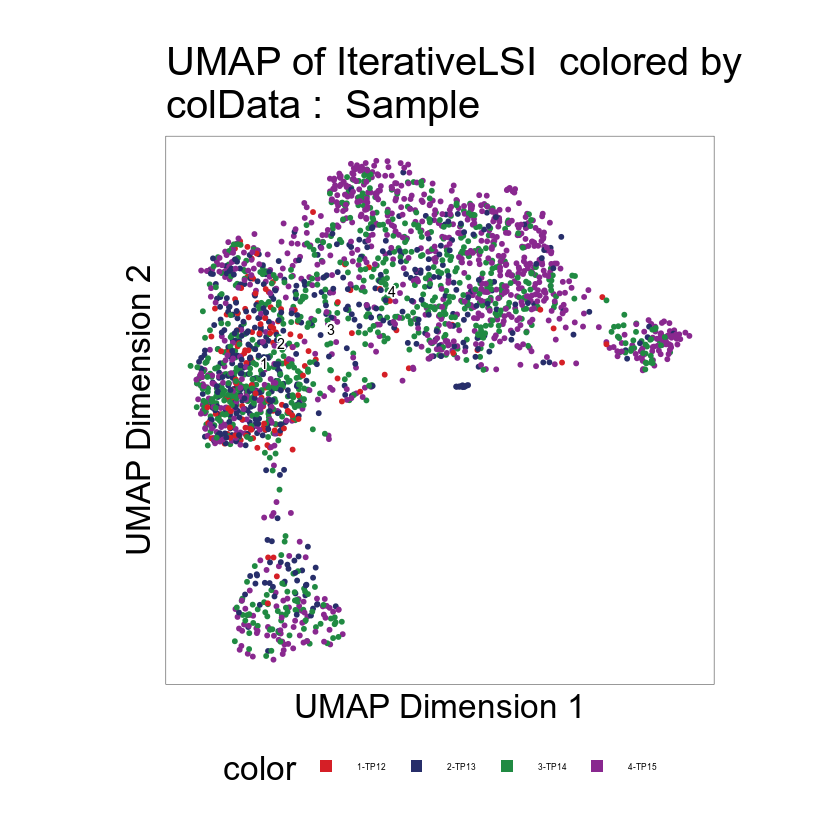

In [5]:
plotEmbedding(ArchRProj = Merged.proj2[Merged.proj2@cellColData$chrY > 1],embedding = "UMAP", colorBy ="cellColData", 
              name = c("chrY","cluster","Sample"),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0.0, 0.9),
              size=1,
       baseSize = 20)
plotEmbedding(ArchRProj = Merged.proj2[Merged.proj2@cellColData$chrY < 1],embedding = "UMAP", colorBy ="cellColData", 
              name = c("chrY","cluster","Sample"),
              keepAxis = FALSE,
              plotAs = "points",
                 quantCut = c(0.0, 0.9),
              size=1,
       baseSize = 20)

## Save project


In [283]:

saveRDS(Merged.proj2,file="./gonad_fil_somatic202112/Save-ArchR-Project.rds")

# leydig cell trajectory


In [5]:
Merged.proj2@cellColData$time_cluster <- paste0(Merged.proj2@cellColData$Sample,"_C",Merged.proj2@cellColData$cluster)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-696f58e58900-Date-2022-03-21_Time-16-30-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 

2 

3 

4 

Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-696f58e58900-Date-2022-03-21_Time-16-30-06.log



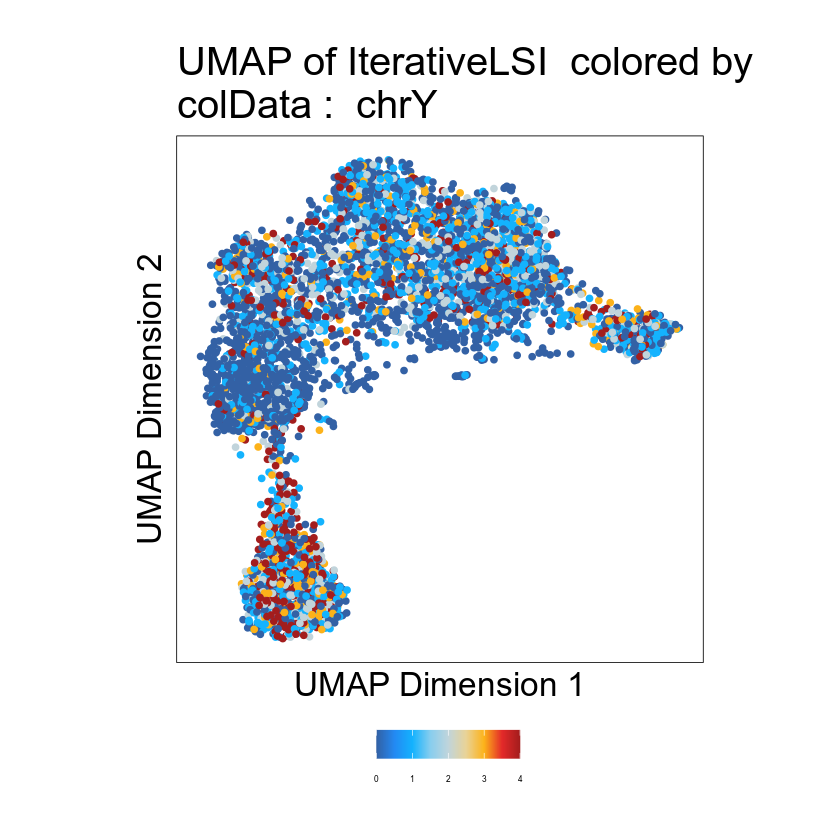

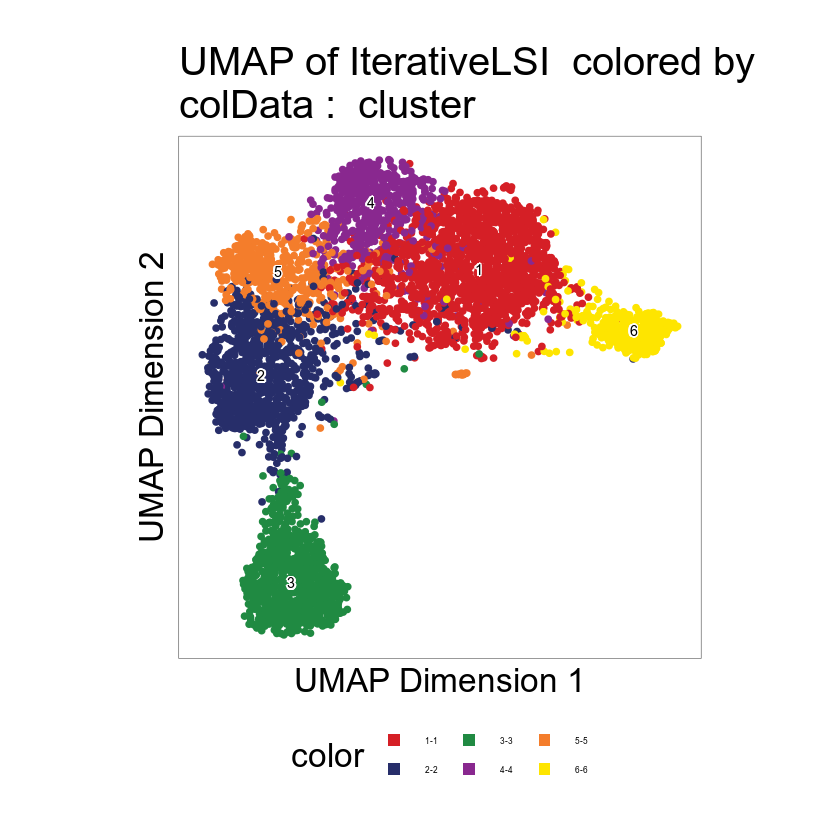

$chrY

$cluster

$Sample

$time_cluster


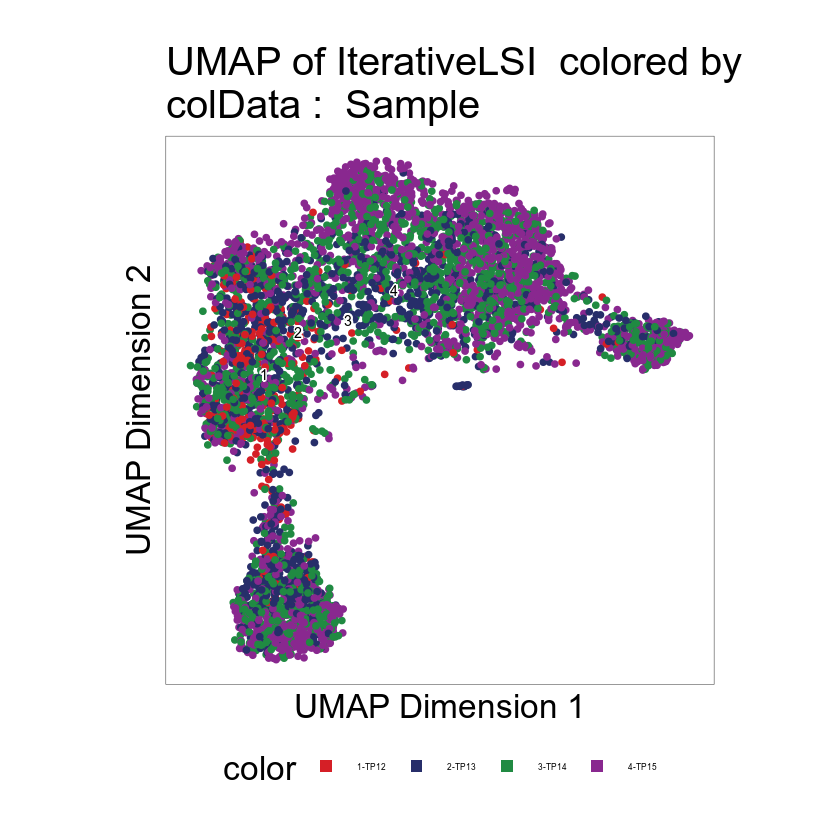

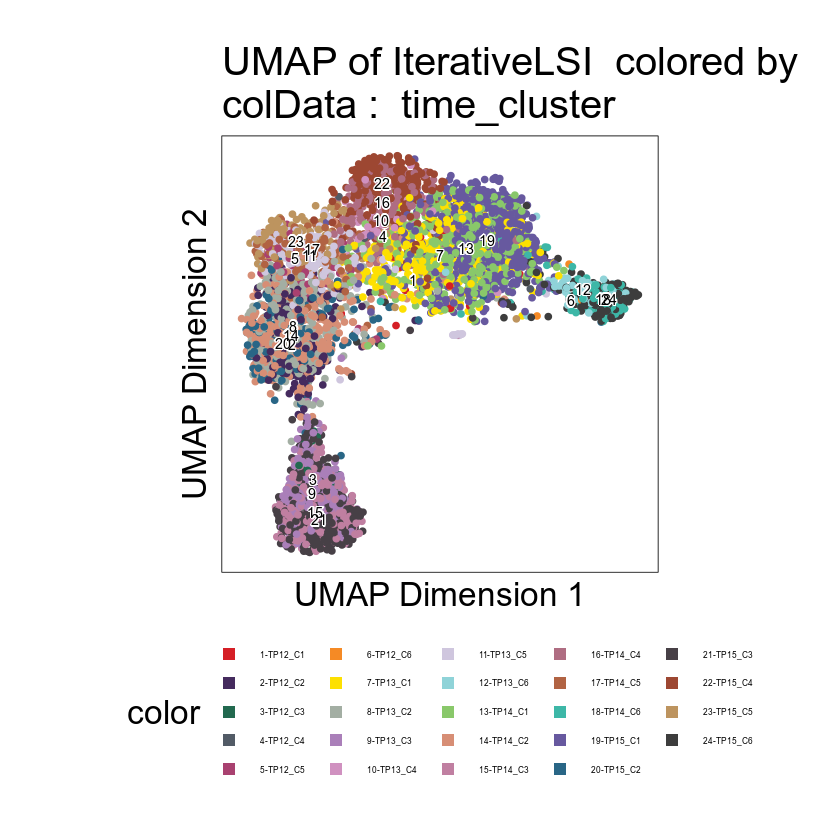

In [6]:
plotEmbedding(ArchRProj = Merged.proj2,embedding = "UMAP", colorBy ="cellColData", 
              name = c("chrY","cluster","Sample","time_cluster"),
              keepAxis = FALSE,
              
              plotAs = "points",
                 quantCut = c(0.0, 0.9),
              size=1.5,
       baseSize = 20)


In [9]:
Merged.proj2.TP13.name <- Merged.proj2@cellColData %>% as.data.frame %>% dplyr::filter(Sample=="TP13") %>% rownames
Merged.proj.TP13 <- subsetArchRProject(Merged.proj2,cell=Merged.proj2.TP13.name,outputDirectory = "./Somatic_cell_subset_4sample_TP13_2022",dropCells=FALSE,force= TRUE)
Merged.proj.TP13 <- addImputeWeights(Merged.proj.TP13,k=15,ka=4,td=3,sampleCells = 5000,reducedDims = "IterativeLSI")



Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /lustre/home/jasonliao/teaching_server/sex_differentiation/Somatic_cell_subset_4sample_TP13_2022

Copying Arrow Files...

Copying Arrow Files (1 of 1)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 9): Annotations

Copying Other Files (2 of 9): Background-Peaks.rds

Copying Other Files (3 of 9): Embeddings

Copying Other Files (4 of 9): GroupCoverages

Copying Other Files (5 of 9): IterativeLSI

Copying Other Files (6 of 9): Peak2GeneLinks

Copying Other Files (7 of 9): PeakCalls

Copying Other Files (8 of 9): Plots

Copying Other Files (9 of 9): RNAIntegration

Saving ArchRProject...

Loading ArchRProject...



ERROR: Error in loadArchRProject(path = outputDirectory): Positions for peakAnnotation do not exist in saved ArchRProject!


ArchR logging to : ArchRLogs/ArchR-addTrajectory-b651f585627-Date-2022-10-20_Time-11-53-33.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-b651f585627-Date-2022-10-20_Time-11-53-33.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-b65169f5539b-Date-2022-10-20_Time-11-53-36.log
If there is an issue, please report to github with logFile!

Plotting


Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory


Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-b65169f5539b-Date-2022-10-20_Time-11-53-36.log

Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”


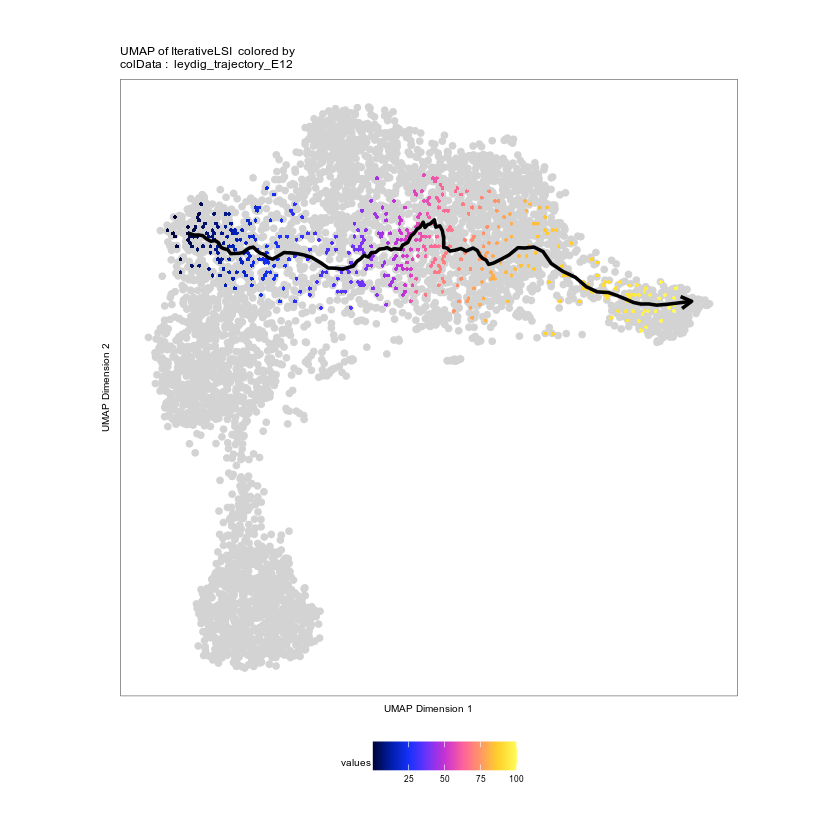

In [9]:
# Major gran
# Major.trajectory <- c("TP12_C2", "TP13_C2", "TP14_C2","TP15_C2",)
Major.trajectory <- c("TP13_C5","TP13_C1","TP13_C6")
Merged.proj2 <- addTrajectory(
     ArchRProj = Merged.proj2, 
     name = "leydig_trajectory_E12", 
     groupBy = "time_cluster",
     trajectory = Major.trajectory, 
     embedding = "UMAP", 
     force = TRUE
 )

p <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", colorBy = "cellColData", name = "leydig_trajectory_E12")
p[[1]]
# p.2 <- plotTrajectory(Merged.proj2, trajectory = "Minor_trajectory", colorBy = "cellColData", name = "Minor_trajectory")
# p.2[[1]]
# pdf(file="./2022Figure/202201.leydig.E12.trajectory.pdf")
# p[[1]]
# dev.off()


# Integrated analysis


In [7]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "MotifMatrix", log2Norm = FALSE,scaleTo = NULL)

Creating Trajectory Group Matrix..

Smoothing...



In [8]:
trajGIM <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "GeneIntegrationMatrix", log2Norm = FALSE)

Creating Trajectory Group Matrix..

Smoothing...



In [9]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "GeneScoreMatrix", log2Norm = TRUE,
scaleTo = NULL
)

Creating Trajectory Group Matrix..

Smoothing...



In [77]:
corGIM_MM <- correlateTrajectories(trajGIM, trajMM,corCutOff = 0.3,varCutOff1=0.5,varCutOff2=0.5)
trajGIM2 <- trajGIM[corGIM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGIM_MM[[1]]$name2, ]
trajCombined <- trajGIM2


tmp <- t(apply(assay(trajGIM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))
colnames(tmp) <- assay(trajCombined) %>% colnames
assay(trajCombined) <- tmp
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGIM2))


ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-cf86402e0b4e-Date-2023-04-21_Time-22-15-25.log
If there is an issue, please report to github with logFile!

Found 43 Correlated Pairings!

2023-04-21 22:16:08 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf861622ddbc-Date-2023-04-21_Time-22-16-08.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf861622ddbc-Date-2023-04-21_Time-22-16-08.log



In [78]:
combinedMat2 <- combinedMat[-21,]
rowOrder <- match(rownames(combinedMat2), rownames(trajGIM2[-22,]))


ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf86822b820-Date-2023-04-21_Time-22-16-09.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf86822b820-Date-2023-04-21_Time-22-16-09.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf86339e4813-Date-2023-04-21_Time-22-16-10.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2023-04-21 22:16:10 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2023-04-21 22:16:10 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTraj

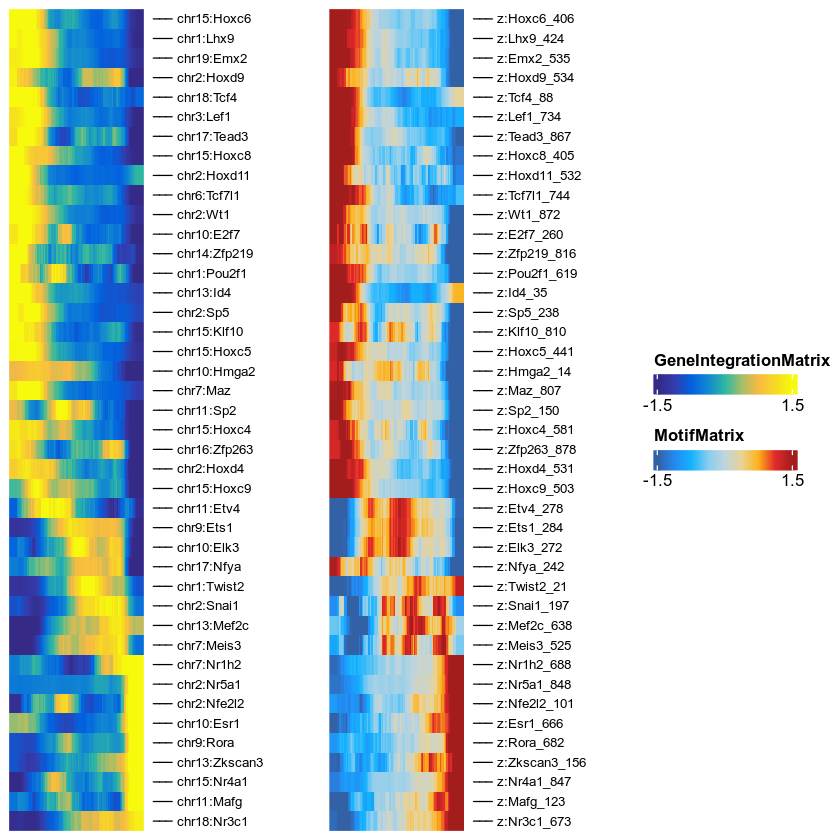

In [79]:
ht1 <- plotTrajectoryHeatmap(trajGIM2[-22,],  pal = paletteContinuous(set = "blueYellow"),  varCutOff = 0, rowOrder = rowOrder, labelTop = 150)
ht2 <- plotTrajectoryHeatmap(trajMM2[-22,], pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder, labelTop = 150)
ht1 + ht2

In [80]:
pdf("./iscience_revision/stromal.positive_regulator.pdf")
ht1 + ht2
dev.off()

png 
  2

In [69]:
trajMM


class: SummarizedExperiment 
dim: 1768 100 
metadata(1): Params
assays(2): smoothMat mat
rownames(1768): deviations:Tcfap2a_1 deviations:Tcfap2b_2 ...
  z:Smad5_883 z:Smad9_884
rowData names(3): seqnames idx name
colnames(100): T.0_1 T.1_2 ... T.98_99 T.99_100
colData names(0):

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf86498333a3-Date-2023-04-21_Time-22-05-41.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2023-04-21 22:05:42 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2023-04-21 22:05:42 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-cf86498333a3-Date-2023-04-21_Time-22-05-41.log



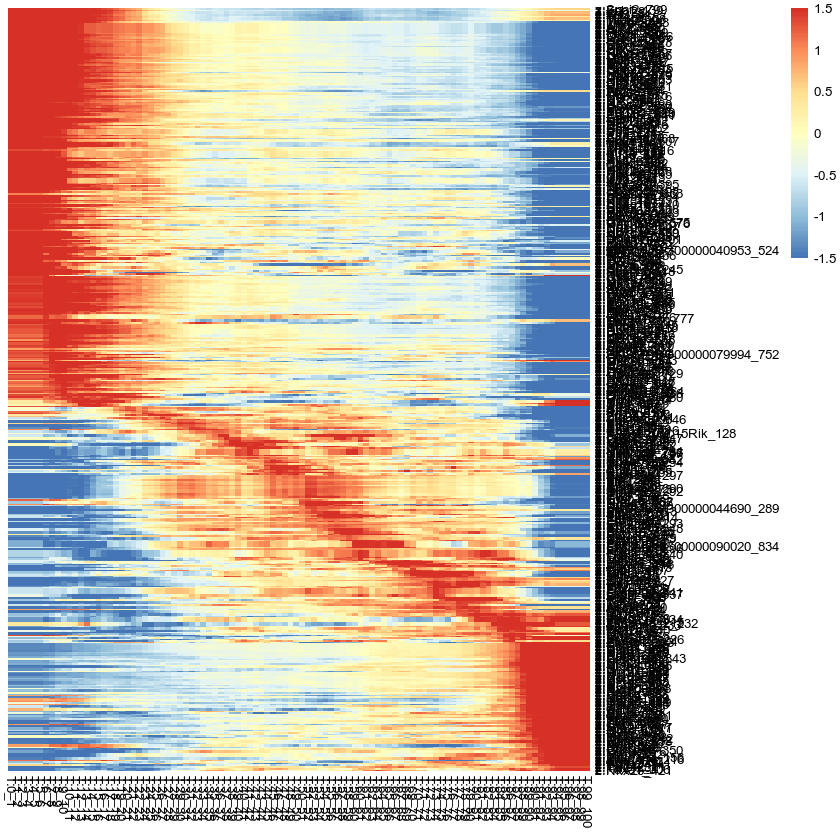

In [70]:
# trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "MotifMatrix", log2Norm = FALSE,scaleTo = NULL)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100,labelRows = TRUE, 
                           returnMatrix = TRUE,varCutOff = 0.4
                           )
library(pheatmap)
p1 %>% pheatmap(cluster_rows = FALSE,
       cluster_cols = FALSE,
               border_color = FALSE,
         width = 10, height = 10,fontsize = 8,
#                 filename = "./2022Figure/202112.leydig.time.E12.MM.pdf"
               )

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-2dc42ffad248-Date-2022-01-04_Time-12-32-08.log
If there is an issue, please report to github with logFile!

Plotting

Warning message:
“Removed 4593 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-2dc42ffad248-Date-2022-01-04_Time-12-32-08.log

Warning message:
“Removed 4593 rows containing non-finite values (stat_summary_hex).”
Warning message:
“Removed 4593 rows containing non-finite values (stat_summary_hex).”


png 
  2

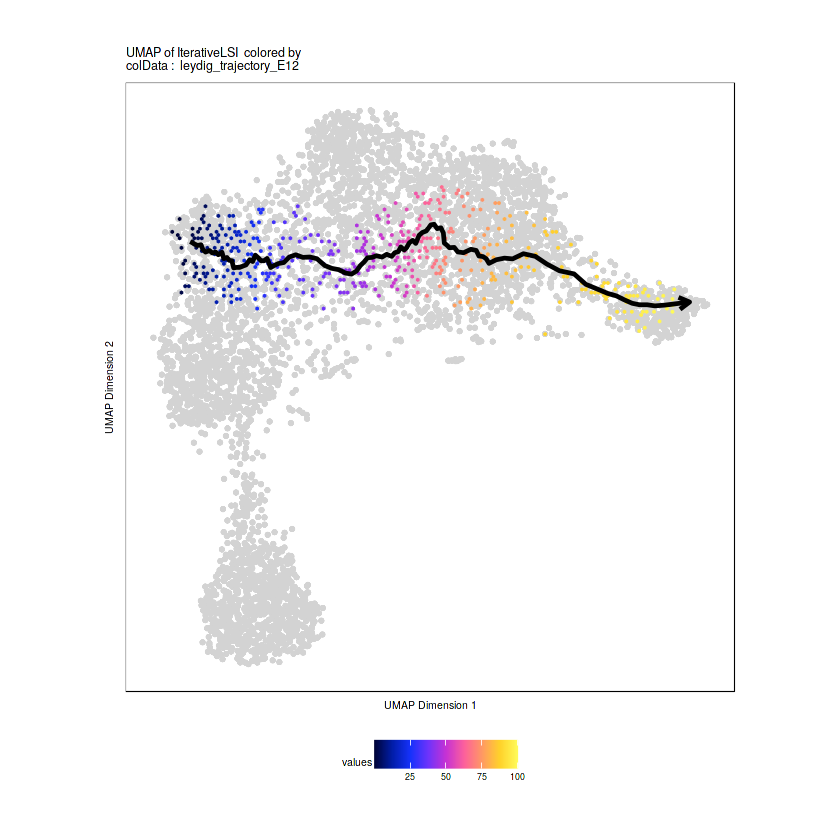

In [13]:
p <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", colorBy = "cellColData", name = "leydig_trajectory_E12")
p[[1]]

pdf(file="./2022Figure/202201.leydig.E12.trajectory.pdf")
p[[1]]
dev.off()

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc44da26b80-Date-2022-01-04_Time-12-26-12.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc44da26b80-Date-2022-01-04_Time-12-26-12.log



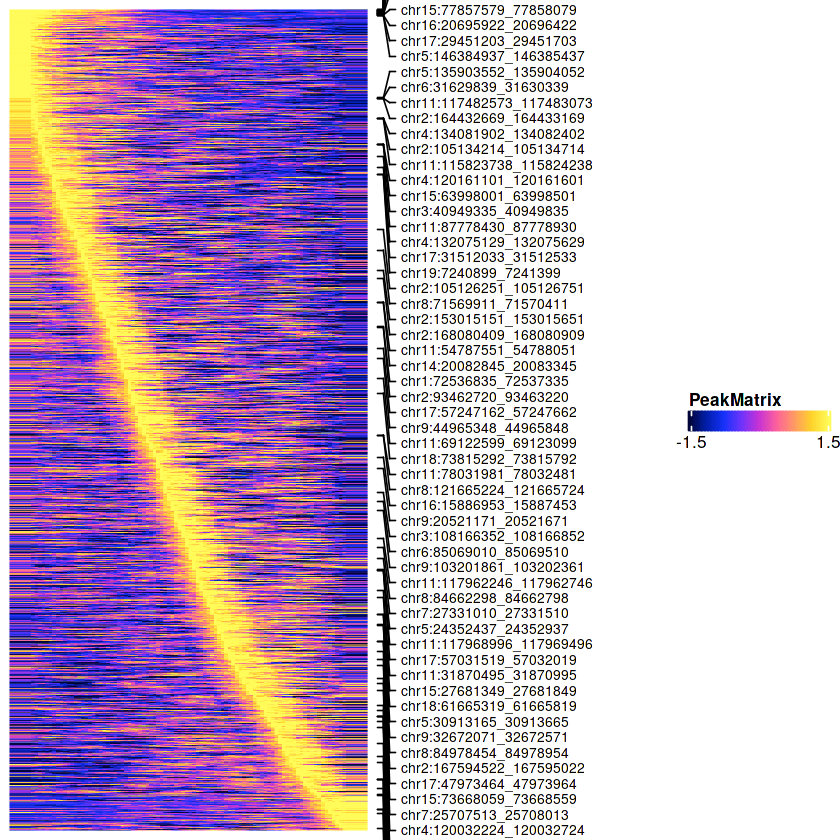

In [11]:
trajPM  <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "PeakMatrix", log2Norm = TRUE)
p0 <- plotTrajectoryHeatmap(trajPM, returnMatrix = FALSE, pal = paletteContinuous(set = "horizonExtra"),labelTop = 100,varCutOff = 0.975)
p0

In [88]:
p0 %>% as.data.frame()%>% write.csv("sertoli_time_peak.csv")

In [14]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "MotifMatrix", log2Norm = FALSE,scaleTo = NULL)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100,labelRows = TRUE, 
                           returnMatrix = TRUE
                           )
library(pheatmap)
p1 %>% pheatmap(cluster_rows = FALSE,
       cluster_cols = FALSE,
               border_color = FALSE,
         width = 10, height = 10,fontsize = 8,
#                 filename = "./2022Figure/202112.leydig.time.E12.MM.pdf"
               )

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc43fccf3a-Date-2022-01-04_Time-12-32-36.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-04 12:32:36 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-04 12:32:36 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc43fccf3a-Date-2022-01-04_Time-12-32-36.log



In [32]:
motifs <- c("Tcf21","Esr2","Ppard","Nr5a1","Rarg","Tcfap4")
markerMotifs <- getFeatures(Merged.proj2, select = paste(motifs, collapse="|"), useMatrix = "MotifMatrix")
markerMotifs

[1] "z:Nr5a1_848"          "z:Esr2_668"           "z:Ppard_656"         
 [4] "z:Rarg_654"           "z:Tcf21_79"           "z:Tcfap4_20"         
 [7] "deviations:Nr5a1_848" "deviations:Esr2_668"  "deviations:Ppard_656"
[10] "deviations:Rarg_654"  "deviations:Tcf21_79"  "deviations:Tcfap4_20"

In [33]:
p1 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Tcf21_79"), continuousSet = "solarExtra")
p2 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Nr5a1_848"), continuousSet = "solarExtra")
p3 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Rarg_654"), continuousSet = "solarExtra")
p4 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Esr2_668"), continuousSet = "solarExtra")
p5 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Ppard_656"), continuousSet = "solarExtra")
p6 <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Tcfap4_20"), continuousSet = "solarExtra")


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-b6511fcb4acc-Date-2022-10-20_Time-13-09-47.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2022-10-20 13:09:51 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting


Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory


Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-b6511fcb4acc-Date-2022-10-20_Time-13-09-47.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-b6511ada8d45-Date-2022-10-20_Time-13-09-56.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2022-10-20 13:09:59 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting


Warning message:
“Removed 4596 rows containing non-finite values (stat_

In [34]:
pdf("./2022Figure/leydig.MM.gene.example.pdf",width=5,height=10)
p1[[2]]
p2[[2]] 
p3[[2]]
p4[[2]] 
p5[[2]] 
p6[[2]] 

dev.off()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-b6514621320c-Date-2022-10-20_Time-11-58-45.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2022-10-20 11:58:49 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Using weights on disk

1 of 1

Plotting


Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory


Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-b6514621320c-Date-2022-10-20_Time-11-58-45.log

Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”
Warning message:
“Removed 4596 rows containing non-finite values (stat_summary_hex).”


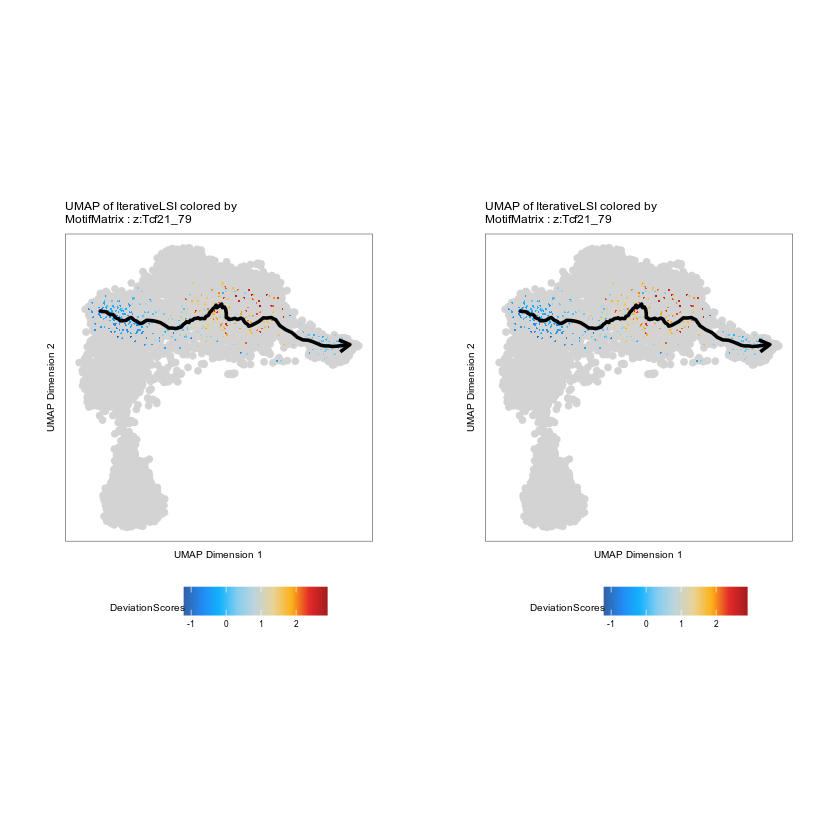

In [14]:
p <- plotTrajectory(Merged.proj2, trajectory = "leydig_trajectory_E12", 
                     colorBy = "MotifMatrix", name = c("z:Tcf21_79"), continuousSet = "solarExtra",size = 1,
       rastr = TRUE,
       quantCut = c(0.01, 0.99),
       quantHex = 0.5,)
ggAlignPlots(p[[1]], p[[1]], type = "h")

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-696f7add14b8-Date-2022-03-21_Time-17-04-12.log
If there is an issue, please report to github with logFile!

2022-03-21 17:04:12 : Validating Region, 0.005 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr2 38692656-38714542      - |       26423       Nr5a1
  -------
  seqinfo: 21 sequences from mm10 genome


2022-03-21 17:04:12 : Adding Bulk Tracks (1 of 1), 0.007 mins elapsed.

Getting Region From Arrow Files 1 of 4

Getting Region From Arrow Files 2 of 4

Getting Region From Arrow Files 3 of 4

Getting Region From Arrow Files 4 of 4

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-21 17:04:18 : Adding Feature Tracks (1 of 1), 0.106 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-21 17:04:18 : Adding Loop Tracks (1 of 1), 0.107 mins elapsed.

2022-03-21 17:04:18 : Adding Gene Tracks (1 of 1), 0.112 mins elapsed.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
2022-03-21 17:04:19 : Plotting, 0.116 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-696f7add14b8-Date-2022-03-21_Time-17-04-12.log



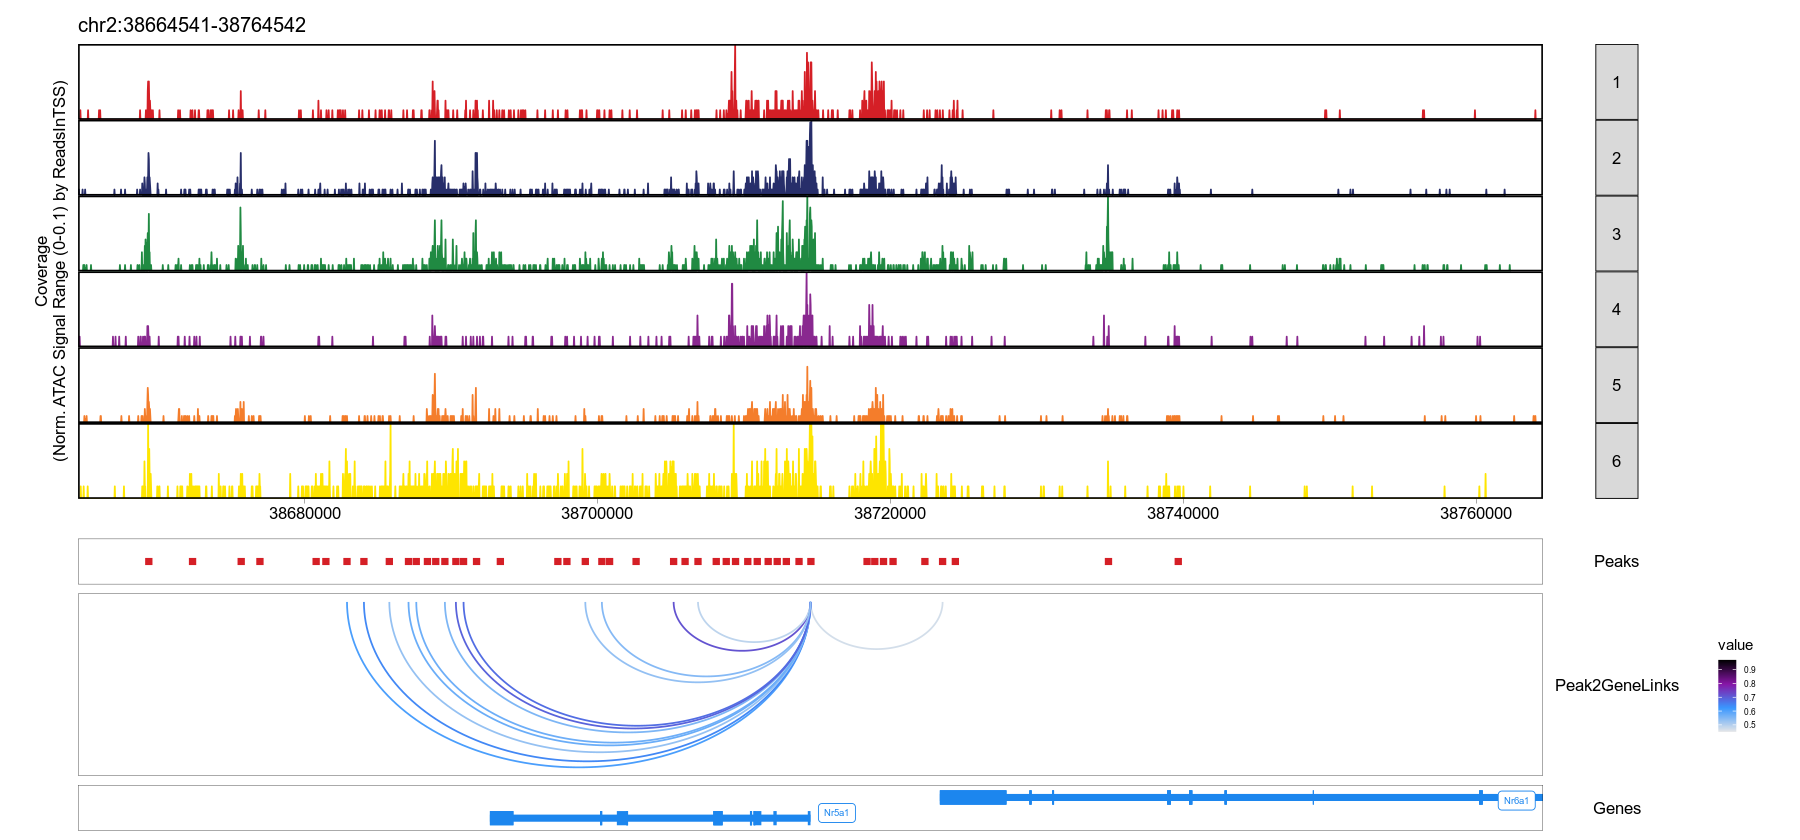

In [22]:
p <- plotBrowserTrack(
    ArchRProj = Merged.proj2, 
    groupBy = "cluster", 
        geneSymbol = "Nr5a1", 
    
# features = GRangesList(TrackA = GRanges("chr1:74751267-74760079"), chr1:74749883-74761404
#                        TrackB = ("chr2:105120673-105132509"),
#     peak =getPeakSet(Merged.proj2)),
    upstream = 50000,
    downstream = 50000,
         tileSize = 25,
    loops = getPeak2GeneLinks(Merged.proj2),
        sizes = c(5, 0.5, 2, 0.5),

  log2Norm = TRUE,

  minCells = 25,
  normMethod = "ReadsInTSS",
  ylim = NULL,
  pal = NULL,
  baseSize = 10,
  scTileSize = 0.5,
  scCellsMax = 100,
  borderWidth =2,
  tickWidth = 0.2,
  facetbaseSize = 10,
    
)
options(repr.plot.width=15
       )
grid::grid.newpage()
grid::grid.draw(p[[1]])

In [17]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2, name = "leydig_trajectory_E12", useMatrix = "GeneScoreMatrix", log2Norm = TRUE,
scaleTo = NULL
)
p2 <- plotTrajectoryHeatmap(trajGSM,  pal = paletteContinuous(set = "horizonExtra"),labelTop = 100,varCutOff = 0.995, returnMatrix = TRUE)
p2

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc47519fd8-Date-2022-01-04_Time-12-35-15.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc47519fd8-Date-2022-01-04_Time-12-35-15.log



T.0_1       T.1_2       T.2_3       T.3_4       T.4_5      
chr19:Myrf          1.500000    1.500000    1.500000    1.500000    1.500000   
chr15:Odf3b         1.500000    1.500000    1.500000    1.500000    1.500000   
chr19:Mir6985       1.500000    1.500000    1.500000    1.500000    1.500000   
chr8:Pcp2           1.500000    1.500000    1.500000    1.500000    1.500000   
chrX:Magee1         1.500000    1.500000    1.500000    1.500000    1.500000   
chr11:Krt14         1.500000    1.500000    1.500000    1.500000    1.500000   
chr3:Wnt2b          1.500000    1.500000    1.500000    1.500000    1.500000   
chr4:Smim1          1.500000    1.500000    1.500000    1.500000    1.500000   
chr2:Mir126a        1.500000    1.500000    1.500000    1.500000    1.500000   
chr4:Angptl7        1.409824    1.409824    1.409824    1.409824    1.409824   
chr5:Upk3b          1.500000    1.500000    1.500000    1.500000    1.500000   
chr10:Ascl4         1.500000    1.500000    1.500000    1.500000    1.500000   
chr11:1700051A21Rik 1.500000    1.500000    1.500000    1.500000    1.500000   
chr9:Hspb2          1.500000    1.500000    1.500000    1.500000    1.500000   
chr7:Bnc1           1.500000    1.500000    1.500000    1.500000    1.500000   
chr14:Mir346        1.500000    1.500000    1.500000    1.500000    1.500000   
chr7:Klk8           1.500000    1.500000    1.500000    1.500000    1.500000   
chr7:Fam187b        1.500000    1.500000    1.500000    1.500000    1.500000   
chr1:Sft2d2         1.500000    1.500000    1.500000    1.500000    1.500000   
chr15:Gpt           1.365504    1.365504    1.365504    1.365504    1.365504   
chr2:Mir1953        1.397268    1.397268    1.397268    1.397268    1.397268   
chr7:Spaca4         1.377294    1.377294    1.377294    1.377294    1.377294   
chr5:2610524H06Rik  1.155965    1.155965    1.155965    1.155965    1.155965   
chr8:Mir181d        1.273585    1.273585    1.273585    1.273585    1.273585   
chr7:Fbxo27         1.492443    1.492443    1.492443    1.492443    1.492443   
chr15:Rhebl1        1.238028    1.238028    1.238028    1.238028    1.238028   
chr13:Mir1983       1.356477    1.356477    1.356477    1.356477    1.356477   
chr7:Klc3           1.347416    1.347416    1.347416    1.347416    1.347416   
chr15:BC037032      1.382819    1.382819    1.382819    1.382819    1.382819   
chr11:Myl7          1.356487    1.356487    1.356487    1.356487    1.356487   
⋮                   ⋮           ⋮           ⋮           ⋮           ⋮          
chr14:Mir208b       -1.01418744 -1.01418744 -1.01418744 -1.01418744 -1.01418744
chr17:Sapcd1        -0.59223404 -0.59223404 -0.59223404 -0.59223404 -0.59223404
chr5:Mir7034         0.81150260  0.81150260  0.81150260  0.81150260  0.81150260
chr9:Mir199a-1      -1.07745857 -1.07745857 -1.07745857 -1.07745857 -1.07745857
chr4:Mir7022        -0.75725646 -0.75725646 -0.75725646 -0.75725646 -0.75725646
chr9:Gm16130        -0.74001252 -0.74001252 -0.74001252 -0.74001252 -0.74001252
chr10:Gpr182        -1.25163218 -1.25163218 -1.25163218 -1.25163218 -1.25163218
chr11:Grin2c        -0.29041636 -0.29041636 -0.29041636 -0.29041636 -0.29041636
chr1:Ren1           -1.20566696 -1.20566696 -1.20566696 -1.20566696 -1.20566696
chr7:Mir7-2         -1.04622264 -1.04622264 -1.04622264 -1.04622264 -1.04622264
chr8:Col4a1         -1.34243555 -1.34243555 -1.34243555 -1.34243555 -1.34243555
chr18:4930426D05Rik -0.03621179 -0.03621179 -0.03621179 -0.03621179 -0.03621179
chr7:Mir202         -0.52062414 -0.52062414 -0.52062414 -0.52062414 -0.52062414
chr3:Mir7014        -1.50000000 -1.50000000 -1.50000000 -1.50000000 -1.50000000
chr9:1700003G13Rik  -0.70730573 -0.70730573 -0.70730573 -0.70730573 -0.70730573
chr11:Mir3968       -1.27451199 -1.27451199 -1.27451199 -1.27451199 -1.27451199
chr6:Plxnd1         -1.07989974 -1.07989974 -1.07989974 -1.07989974 -1.07989974
chr4:Nr0b2          -1.19539726 -1.19539726 -1.19539726 -1.19539726 -1.19539726
chr7:Mir7686        

In [18]:
p2 %>% pheatmap(cluster_rows = FALSE,
       cluster_cols = FALSE,
               border_color = FALSE,
         width = 10, height = 15,fontsize = 8,
                filename = "./2022Figure/202201.leydig.time.E12.GSM.pdf"
               )

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-5d4122335e89-Date-2022-01-03_Time-14-46-52.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2022-01-03 14:46:52 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1004 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-5d4122335e89-Date-2022-01-03_Time-14-46-52.log

Warning message:
“Removed 1004 rows containing non-finite values (stat_summary_hex).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



[[1]]

[[2]]


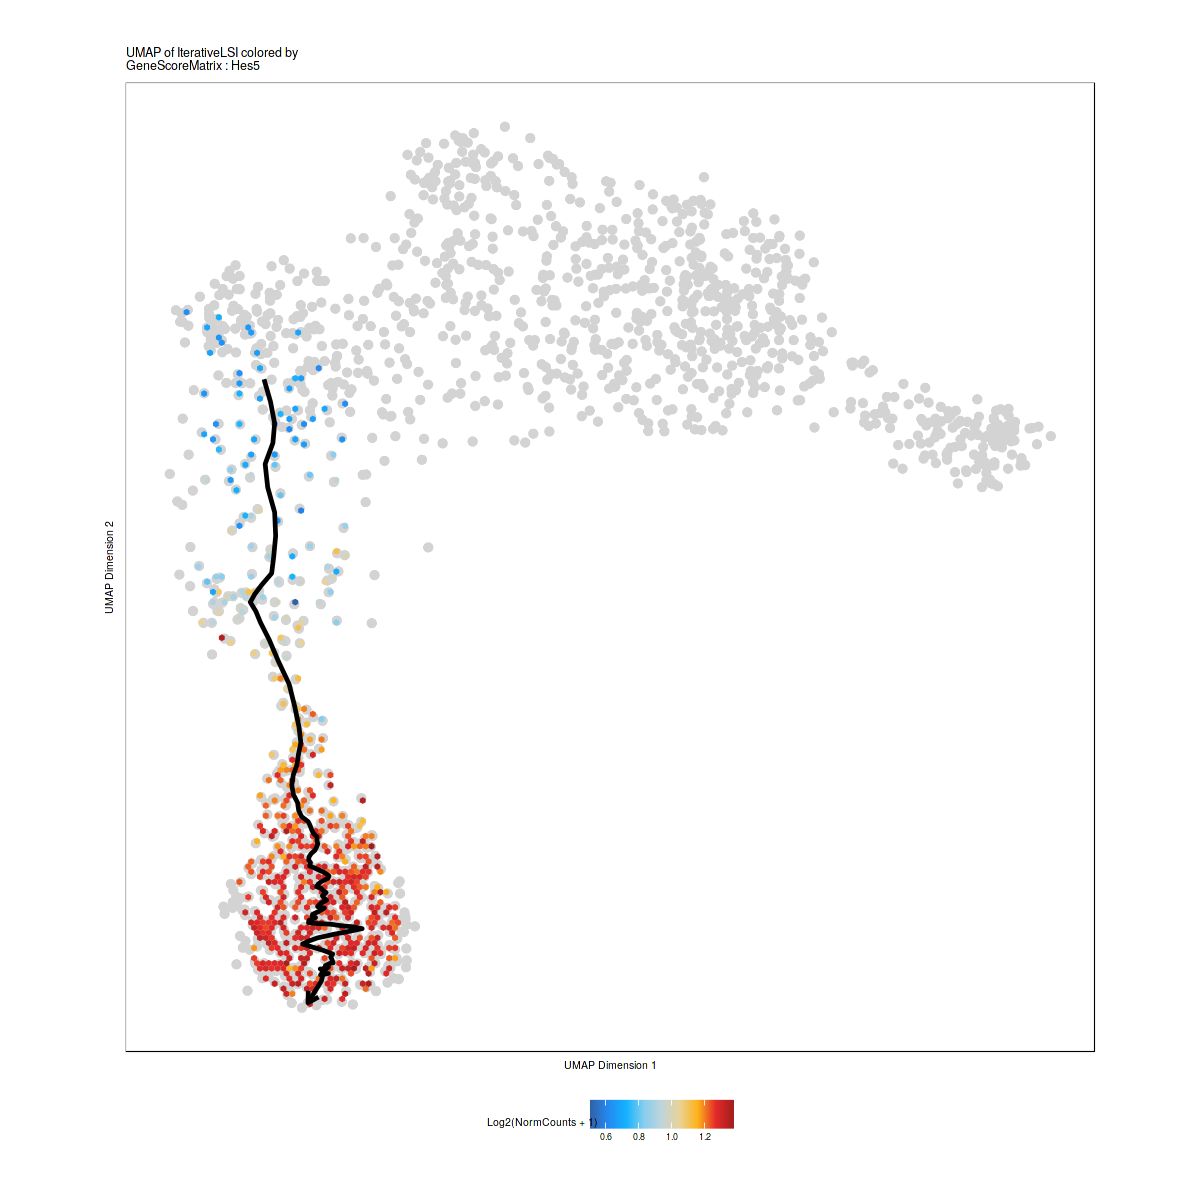

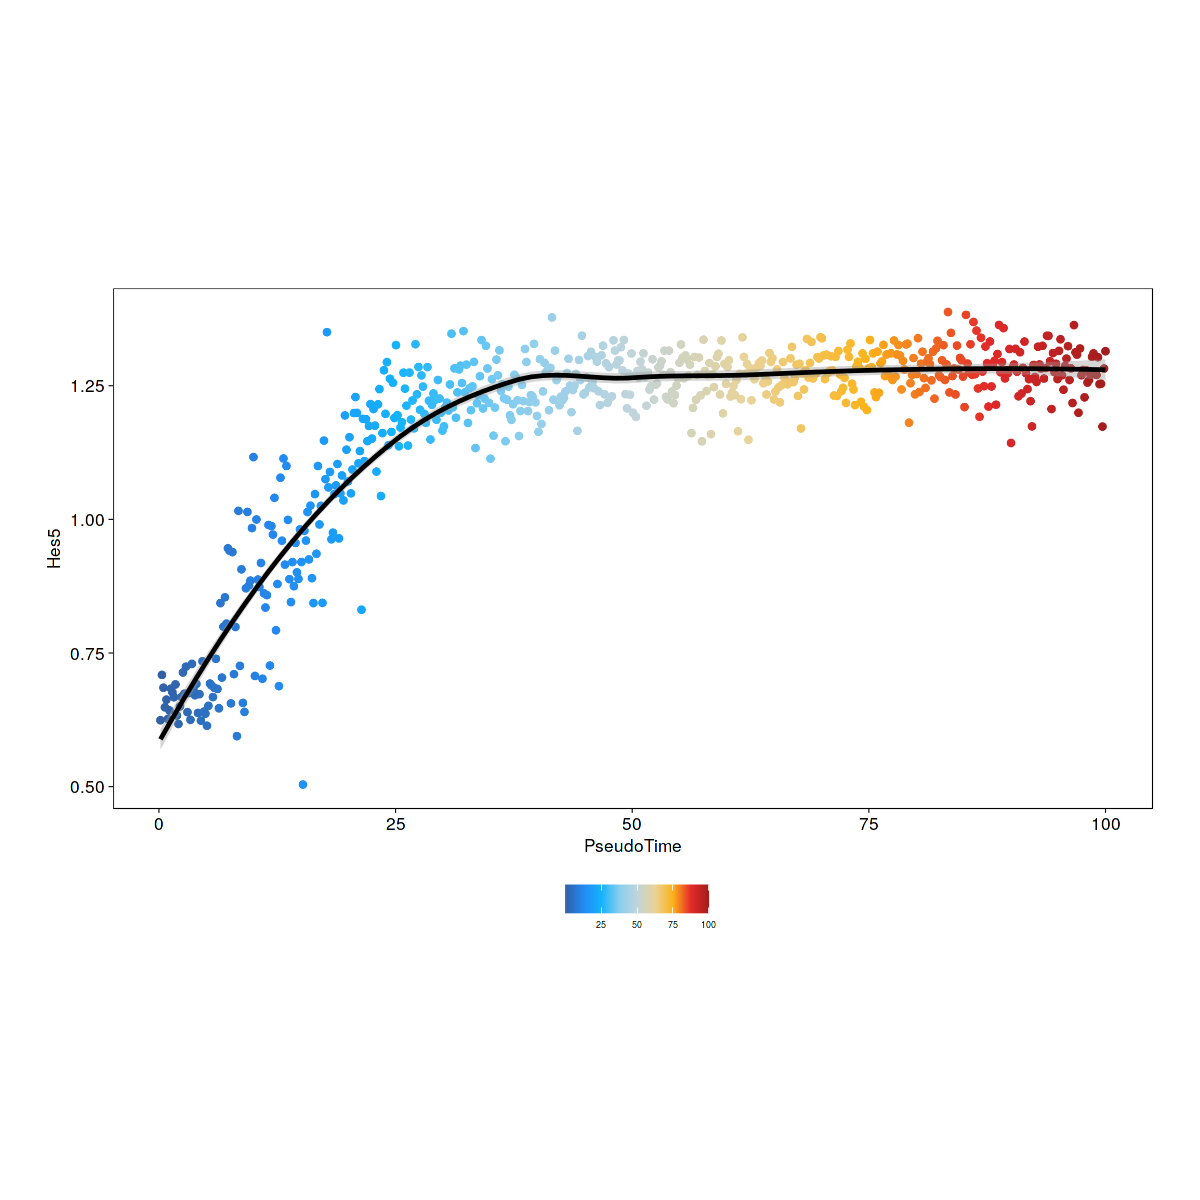

In [209]:
plotTrajectory(Merged.proj.male, trajectory = "Major_trajectory", 
                     colorBy = "GeneScoreMatrix", name = "Hes5", continuousSet = "solarExtra",quantCut = c(0.01, 1))

In [395]:
trajGIM <- getTrajectory(ArchRProj = Merged.proj2, name = "Major_trajectory", useMatrix = "GeneIntegrationMatrix", log2Norm = FALSE)
p3 <- plotTrajectoryHeatmap(trajGIM,  pal = paletteContinuous(set = "blueYellow"))
p3

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-29f0575806fd-Date-2021-05-29_Time-21-04-46.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-29f0575806fd-Date-2021-05-29_Time-21-04-46.log



In [19]:
#integration
corGSM_MM <- correlateTrajectories(trajGSM, trajMM,corCutOff = 0.2,varCutOff1=0.5,varCutOff2=0.5)
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(
    trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder, labelTop = 100)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder, labelTop = 100)
ht1 + ht2

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-2dc46c2c39f0-Date-2022-01-04_Time-12-56-17.log
If there is an issue, please report to github with logFile!

Found 25 Correlated Pairings!

2022-01-04 12:56:31 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc439f18721-Date-2022-01-04_Time-12-56-31.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc439f18721-Date-2022-01-04_Time-12-56-31.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc44252dfa9-Date-2022-01-04_Time-12-56-31.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc44252dfa9-Date-2022-01-04_Time-12-56-31.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-2dc44a669345-Date-2022-01-04_Time-12-56-32.log
If there is an issue, please report to github with logFile!

u

In [20]:
pdf("./2022Figure/202201.leydig.time.E12.MM.GSM.integration.pdf")
ht1 + ht2
dev.off()

png 
  2